In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import matplotlib
import random as rd
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math

In [2]:
def fun(X, alp: float, beta: float, max_kf: float, trend: float, season: float):
    j = 2
    k = 2
    for i in X[2:]:
        X[i] = (alp * X[i-dt.timedelta(1/24)] + beta * X[i-dt.timedelta(2/24)]) + rd.uniform(-max_kf, max_kf) + trend * j
        if k%(7*24)==0:
            X[i]+=season
        if k%(7*24)==1:
            X[i]-=season
        k+=1
    return X

<AxesSubplot:>

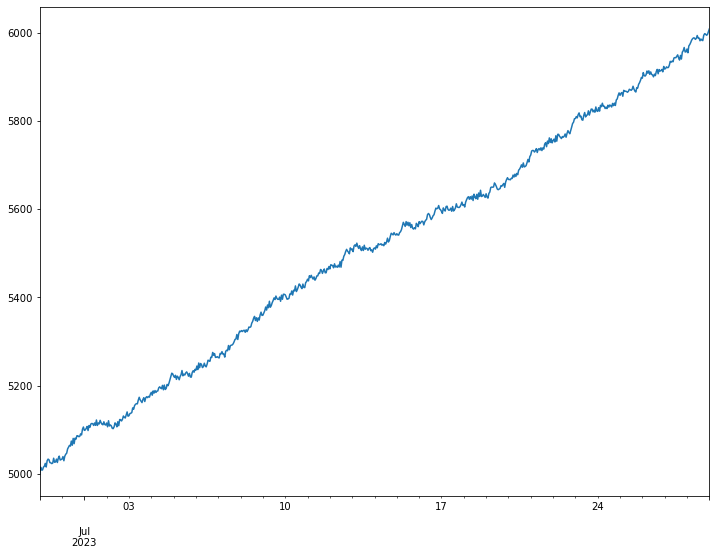

In [4]:
datelist = pd.date_range(start='29/06/2023 00:00:00', end='29/07/2023', freq='H').to_series()
datelist.index = datelist
datelist['29/06/2023 00:00:00'] = 5000.0
datelist['29/06/2023 01:00:00'] = 5015.0
ts = fun(datelist.copy(), 0.55, 0.45, 10, 1, 0)
ts.plot(figsize=(12,9))

<AxesSubplot:>

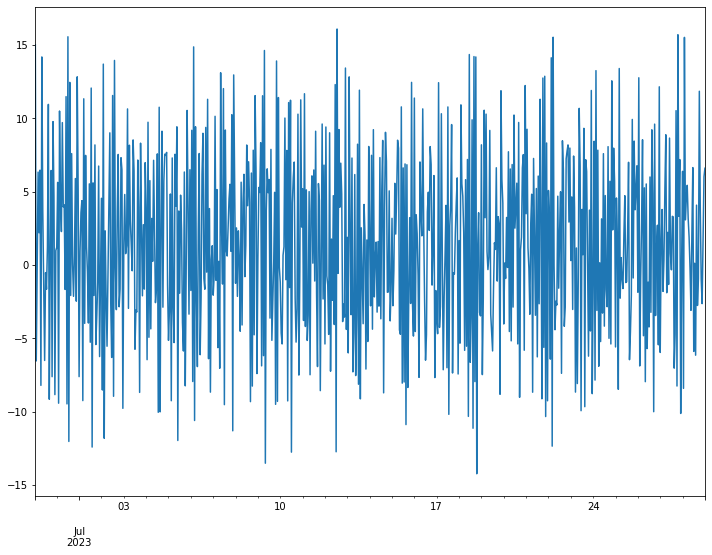

In [5]:
first_diff = ts.diff(periods=1).dropna()
first_diff.plot(figsize=(12,9))

<AxesSubplot:>

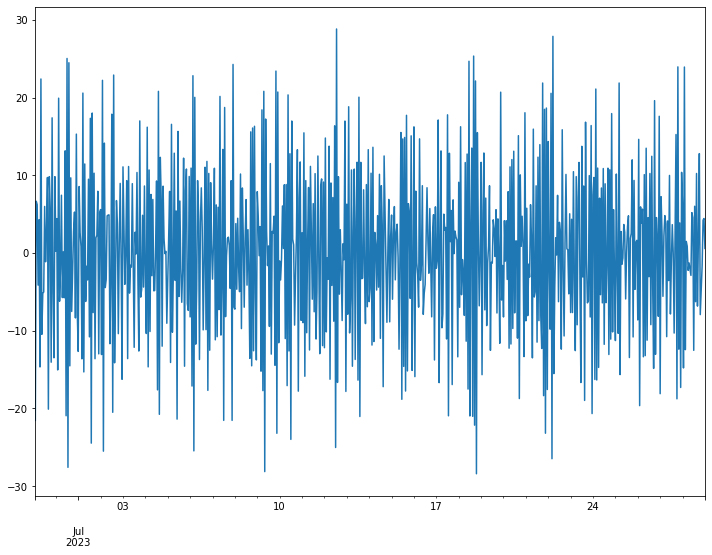

In [9]:
second_diff = first_diff.diff(periods=1).dropna()
second_diff.plot(figsize=(12,9))

<AxesSubplot:>

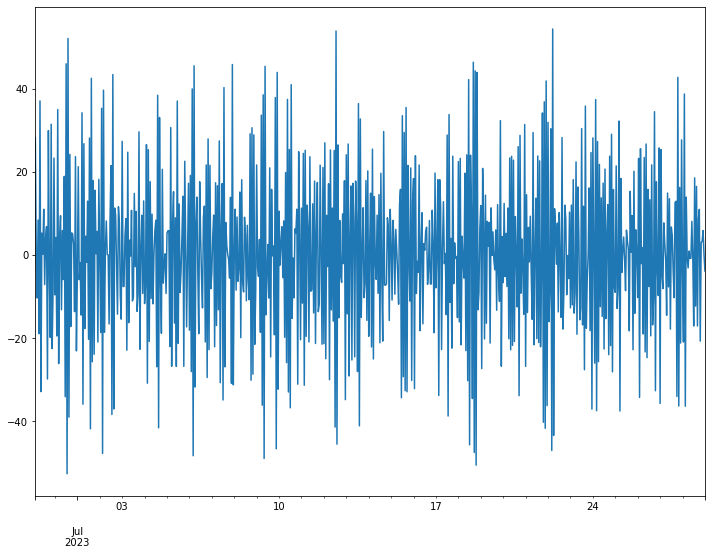

In [10]:
third_diff = second_diff.diff(periods=1).dropna()
third_diff.plot(figsize=(12,9))

<AxesSubplot:>

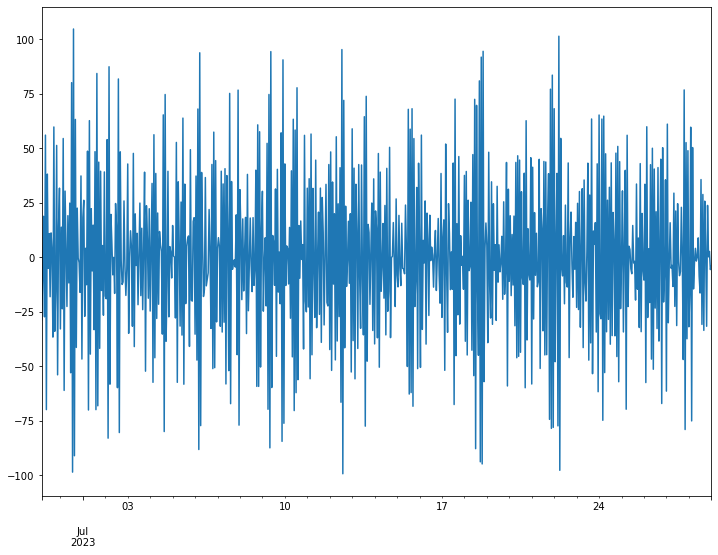

In [11]:
fouth_diff = third_diff.diff(periods=1).dropna()
fouth_diff.plot(figsize=(12,9))

<AxesSubplot:>

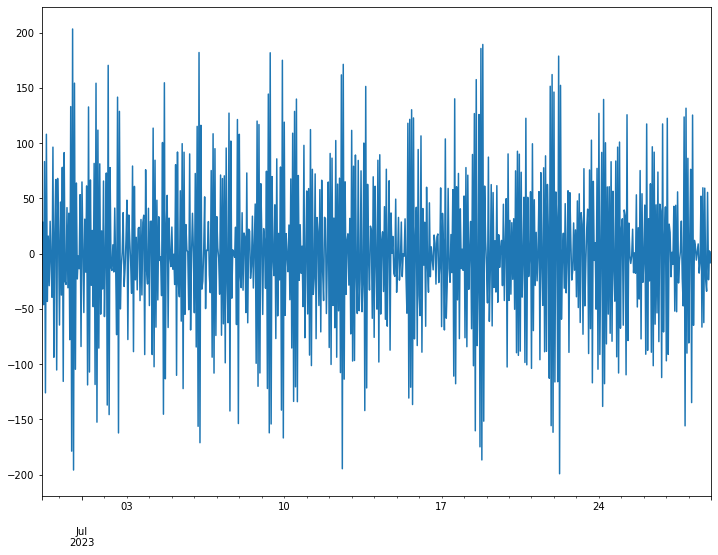

In [12]:
fith_diff = fouth_diff.diff(periods=1).dropna()
fith_diff.plot(figsize=(12,9))